In [41]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_macd, plot_function


In [42]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail()


[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
80     2024-04-26  169.300003  173.690002  171.339996  176.419998  169.179993   
81     2024-04-29  173.500000  167.899994  176.029999  171.380005  173.100006   
82     2024-04-30  170.330002  164.639999  174.990005  169.869995  170.000000   
83     2024-05-01  169.300003  165.570007  172.710007  168.809998  169.110001   
84     2024-05-02  173.029999  168.460007  173.419998  168.529999  170.889999   

Price               
Ticker        GOOG  
80      171.399994  
81      167.059998  
82      164.500000  
83      164.899994  
84      165.690002

In [43]:
### MACD Function for Multiple Stocks
macd_df, macd_vals = calculate_macd(tickers, stock_data)
print(macd_df.tail())
print("MACD values list: ", macd_vals)

        GOOG      AAPL  AAPL_Signal  GOOG_Signal
80  3.877199 -1.455151    -1.710899     3.220121
81  4.209946 -0.982853    -1.565290     3.418086
82  4.162613 -0.854495    -1.423131     3.566992
83  4.152280 -0.826358    -1.303776     3.684049
84  4.327406 -0.497346    -1.142490     3.812721
MACD values list:  {'AAPL': -0.4973461595633353, 'GOOG': 4.327406268760683}


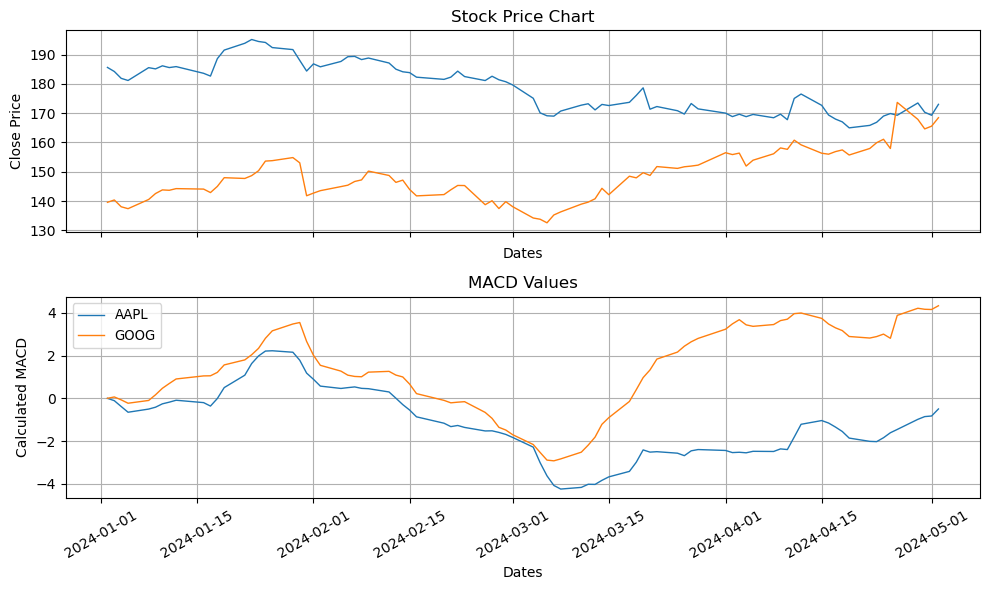

In [44]:
### Plot MACD and Stock Dataframes
plot = plot_function(stock_data, macd_df, tickers, indicator_type = 'MACD')
plot

In [45]:
### Perform Filtering
# BUY Signal - MACD line crosses ABOVE the Signal line (bullish crossover)
#            - Threshold: macd > 0 for buy
# SELL Signal - MACD line crosses BELOW the Signal line (bearish crossover)
#            - Threshold: macd < 0 for sell
for t in tickers:
    # Initialize Buy Signal and Sell Signal columns
    macd_df[f"{t}_Buy_Signal"] = ''
    macd_df[f"{t}_Sell_Signal"] = ''

    buy_condition = (macd_df[t].shift(1) < macd_df[f"{t}_Signal"].shift(1)) & (macd_df[t] > macd_df[f"{t}_Signal"]) & (macd_df[t] > 0)
    sell_condition = (macd_df[t].shift(1) > macd_df[f"{t}_Signal"].shift(1)) & (macd_df[t] < macd_df[f"{t}_Signal"]) & (macd_df[t] < 0)
    
    macd_df.loc[buy_condition, f"{t}_Buy_Signal"] = 'BUY'
    macd_df.loc[sell_condition, f"{t}_Buy_Signal"] = 'SELL'

macd_df.tail()


,GOOG,AAPL,AAPL_Signal,GOOG_Signal,AAPL_Buy_Signal,AAPL_Sell_Signal,GOOG_Buy_Signal,GOOG_Sell_Signal
80,3.877199,-1.455151,-1.710899,3.220121,,,BUY,
81,4.209946,-0.982853,-1.565290,3.418086,,,,
82,4.162613,-0.854495,-1.423131,3.566992,,,,
83,4.152280,-0.826358,-1.303776,3.684049,,,,
84,4.327406,-0.497346,-1.142490,3.812721,,,,


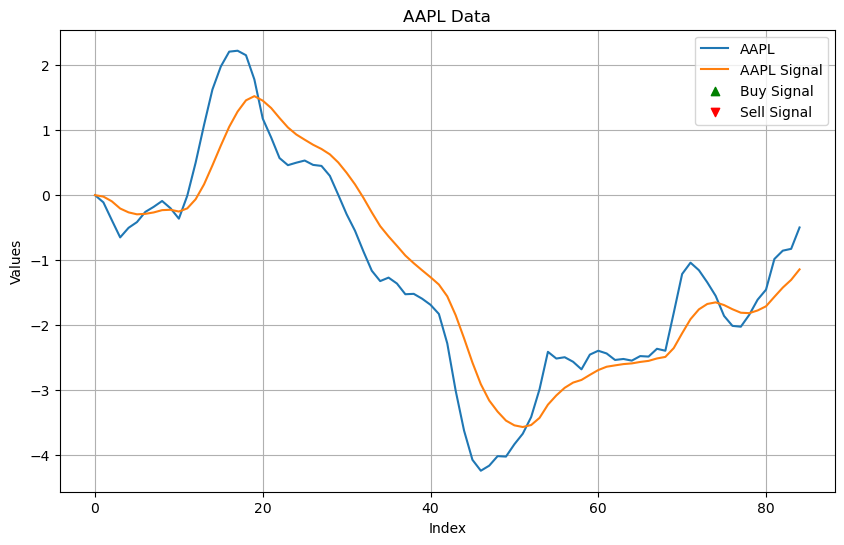

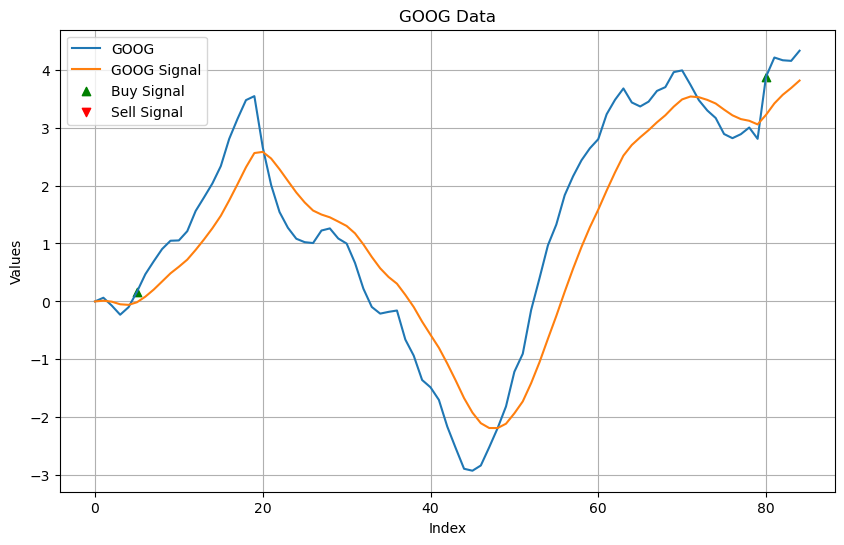

In [46]:

# Iterate through tickers to plot each ticker's data
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(macd_df.index, macd_df[ticker], label=ticker)
    plt.plot(macd_df.index, macd_df[f"{ticker}_Signal"], label=f"{ticker} Signal")
    
    # Plot Buy Signals
    buy_indices = macd_df.index[macd_df[f"{ticker}_Buy_Signal"] == 'BUY']
    plt.scatter(buy_indices, macd_df[macd_df[f"{ticker}_Buy_Signal"] == 'BUY'][ticker], color='green', marker='^', label='Buy Signal')
    
    # Plot Sell Signals
    sell_indices = macd_df.index[macd_df[f"{ticker}_Sell_Signal"] == 'SELL']
    plt.scatter(sell_indices, macd_df[macd_df[f"{ticker}_Sell_Signal"] == 'SELL'][ticker], color='red', marker='v', label='Sell Signal')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{ticker} Data')
    plt.legend()
    plt.grid(True)
    plt.show()